# 測試: 使用(感知器)來解(XOR問題)

## 1-加載 Library

In [19]:
import numpy as np
import pandas as pd
from numpy import random
import seaborn as sns

## 2-載入(訓練集資料)

In [20]:
x1 = random.choice([True, False], 100)
x2 = random.choice([True, False], 100)
df = pd.DataFrame(columns = ["x1", "x2", "y"])
df["x1"] = x1
df["x2"] = x2
df["y"] = np.logical_xor(x1, x2) # XOR運算
df = df.astype(int)
df

,x1,x2,y
0,0,0,0
1,1,1,0
2,0,0,0
3,0,1,1
4,1,0,1
...,...,...,...
95,0,0,0
96,0,1,1
97,0,0,0
98,1,1,0


## 3-繪圖

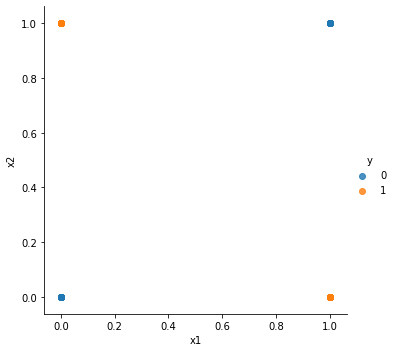

In [21]:
sns.lmplot(x = "x1", y = "x2", hue = "y", data=df, fit_reg = False)

## 4-建立模型-感知器

In [22]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf = clf.fit(df.drop(["y"], axis = 1), df["y"])

## 5-繪圖(感知器)的決策邊界

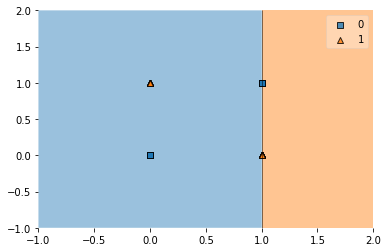

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=np.array(df.drop(["y"], axis = 1)),
                      y=np.array(df["y"]),
                      clf=clf)

## 6-載入(測試集資料)

In [24]:
x1 = random.choice([True, False], 50)
x2 = random.choice([True, False], 50)
df_test = pd.DataFrame(columns = ["x1", "x2", "y"])
df_test["x1"] = x1
df_test["x2"] = x2
df_test["y"] = np.logical_xor(x1, x2) # XOR運算

## 7-預測準確率

In [25]:
from sklearn.metrics import accuracy_score
predict = clf.predict(df_test.drop(["y"], axis = 1))
print("預測:", list(predict))
print("正確標籤:", list(df_test["y"]))
print("正確率: ", accuracy_score(df_test["y"], predict) * 100, "%")

預測: [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0]
正確標籤: [False, False, True, False, False, False, False, False, False, True, False, True, True, False, False, False, True, True, True, True, False, False, True, True, False, True, False, True, False, True, True, False, True, True, False, False, True, True, True, False, True, True, True, False, True, False, True, True, True, False]
正確率:  48.0 %


### 由準確率可以看出, 感知器無法用來解決(XOR問題)